In [11]:
%matplotlib inline
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Read DataFrame
df = pd.read_csv('data/forestfires.csv')

In [7]:
# Inspect data
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [131]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,270.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.844831
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.526712
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,-2.407946
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.760806
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.851598
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,2.735823
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.994703


# Look at spatial distribution

Text(0, 0.5, 'Count')

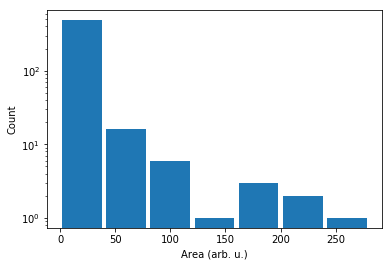

In [122]:
# Create new column with log of area.
df['log_area'] = np.log(df[df['area'] > 0]['area'])

# Make histogram plot with logarithmic y-scale.
plt.hist(df['area'], bins=[0,40,80,120,160,200,240,280], rwidth=.9)
plt.yscale('log')
plt.xlabel('Area (arb. u.)')
plt.ylabel('Count')

From the histogram plot of the area size, we learn, that the frequency
of fires decreaes non-linearly (possibly exponentially) with size of the fires.
In other words, small fires are far more likely to occur. Notably, the count of fires in the 120-140 arb. u. range is very small 

In [129]:
# Create a copy of the dataframe and exclude rows where area = 0
area_gt_zero = df[df['area'] > 0].copy()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,NaN
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,NaN
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,NaN
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,NaN
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,NaN


# Investigate spatial distribution of fire sizes by plotting over X and Y.

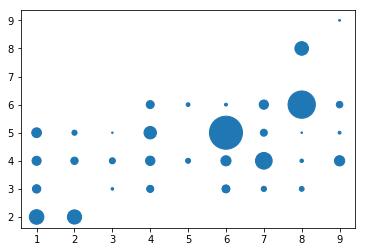

In [49]:
plt.scatter(area_gt_zero['X'], area_gt_zero['Y'], s=area_gt_zero['area'])

In [140]:
area_gt_zero['coord'] = [str(area_gt_zero.iloc[i, 0]), str(area_gt_zero.il for i in range(len(area_gt_zero)



SyntaxError: invalid syntax (<ipython-input-140-711152267b2c>, line 1)

# Look at correlation coefficients

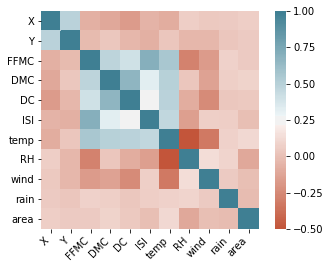

In [120]:
ax = sns.heatmap(
    area_gt_zero.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [80]:
# Check for correlation with area of forest fire
# Take absolut values, to take into account anti-correlated values when sorting
area_gt_zero.corr().abs().sort_values('area', ascending=False).loc[:, ['area']]

,area
area,1.000000
temp,0.110293
RH,0.104846
DMC,0.089088
X,0.070316
FFMC,0.054323
Y,0.050242
DC,0.046735
rain,0.012901
ISI,0.002121


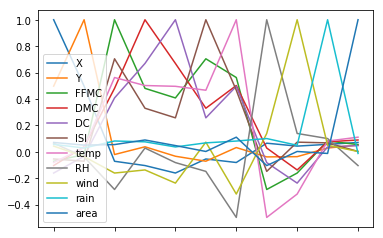

In [117]:
area_gt_zero.corr().plot()

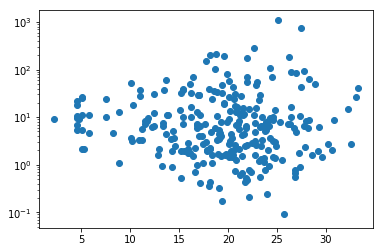

In [123]:
# temp and RH (relative humidity) seem to have a significant impact
# on the area (big surprise), wind and rain (apparently) not so much

#plt.scatter(df['RH'], df['area'])
plt.scatter(area_gt_zero['temp'], area_gt_zero['area'])
plt.yscale('log')

In [ ]:
# Plot h